# stress detection is a challenging task , as ther are so many words taht can be used by people on their posts that ccan show whther a person is having psychological stress or not . while looking for datasets that i can use to train a macchine learning model for stress detection

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\91895\\Downloads\\stress.csv")
df.head()


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [6]:
df.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

# so this datasets does not have any null values , now lets prepare the text columns of this dataset to clean the text column with stopwrds , links , special symbols and language errors:

In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [11]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

# Now let's have a look at the most used words by the peoplee sharing about their life problems on social media by visualizing a word cloud of the text column

<function matplotlib.pyplot.show(close=None, block=None)>

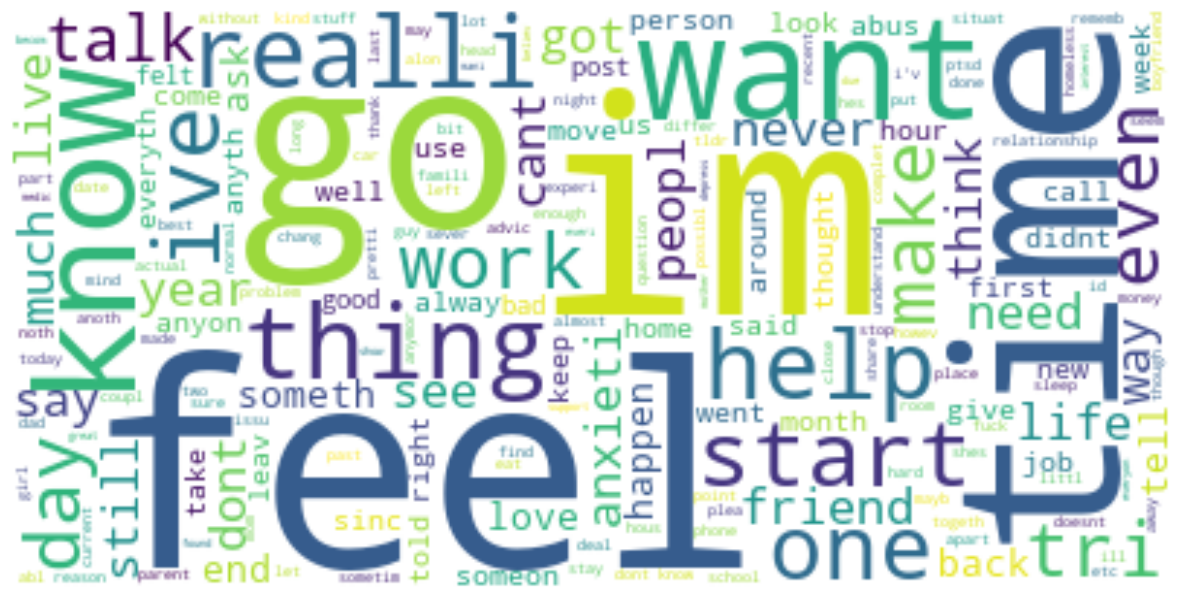

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS ,ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show

# the label column in this dataset contains labels as 0 and 1 , 0 means no stress and  1 means stress . i will use stress and no stress labels instead of 1 and 0 , so let's prepare this column accordingly andselect the text and label columns for the process of training a machine learning model

In [20]:
df["label"] =df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text" , "label"]]
print(df.head())

                                                text      label
0  like want not“ problem take longer ask friend ...  No Stress
1  man front desk titl hr custom servic repres  j...  No Stress
2  wed save much money new housrit expens citi go...     Stress
3  ex use shoot back want go time matter almost w...     Stress
4  haven't said anyth yet i'm sure someon would t...  No Stress


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

# As this task is based on the problem of binary classification, I will be using the Bernoulli Naive Bayes algorithm, which is one of the best algorithms for binary classification problems. So let’s train the stress detection model:

In [22]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

# Now let’s test the performance of our model on some random sentences based on mental health:

In [25]:
 user = input("Enter a Text: ")
 data = cv.transform([user]).toarray()
 output = model.predict(data)
 print(output)

Enter a Text: hii i am lokes
['No Stress']


In [24]:
# df['text'][2] check for stress 